In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

train1 = "Data/readelf/train_dataset1.npz"
train2 = "Data/readelf/train_dataset2.npz"
val = "Data/readelf/val_dataset.npz"
test = "Data/readelf/test_dataset.npz"

# Load numpy array
training_dataset1 = np.load(train1)
training_dataset2 = np.load(train2)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = np.concatenate((training_dataset1['x'], training_dataset2['x']))[:5408]
y_train = np.concatenate((training_dataset1['y'], training_dataset2['y']))[:5408]

# Swap val and test
x_test = val_dataset['x']
y_test = val_dataset['y']

x_val = test_dataset['x'][:896]
y_val = test_dataset['y'][:896]

print("No. of dataset collected: 28")
print("No limit set for data collection except skip random no of files up to 5")
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (5408, 3840, 64) (5408, 3840, 64)
Validation shape:  (896, 3840, 64) (896, 3840, 64)
Test shape:  (2278, 3840, 64) (2278, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mae', 'mse'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 5408 samples, validate on 896 samples
Epoch 1/50
5408/5408 [==============================] - 939s 174ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_squared_error: 0.0252 - val_loss: 0.0415 - val_mean_absolute_error: 0.0415 - val_mean_squared_error: 0.0194
Epoch 2/50
5408/5408 [==============================] - 938s 173ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0209 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348 - val_mean_squared_error: 0.0175
Epoch 3/50
5408/5408 [==============================] - 956s 177ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0196 - val_los

Epoch 34/50
5408/5408 [==============================] - 899s 166ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_squared_error: 0.0180 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 0.0157
Epoch 35/50
5408/5408 [==============================] - 889s 164ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_squared_error: 0.0180 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 0.0157
Epoch 36/50
5408/5408 [==============================] - 915s 169ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_squared_error: 0.0180 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 0.0157
Epoch 37/50
5408/5408 [==============================] - 910s 168ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_squared_error: 0.0180 - val_loss: 0.0159 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 0.0157
Epoch 38/50
5408/5408 [==============================] - 932s 172ms/

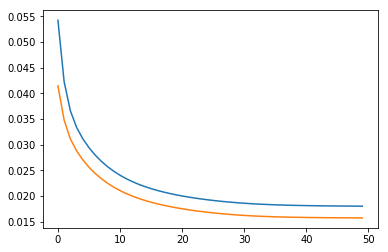

In [10]:
from matplotlib import pyplot
%matplotlib inline
# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss, test_mae_score, test_mse_score = model.evaluate(x_test, y_test)

print("Test MAE score:", test_mae_score)
print("Test loss:", test_loss)
print("Test MSE score:", test_mse_score)

2278/2278 [==============================] - 84s 37ms/step
Test MAE score: 0.019252565507872473
Test loss: 0.019252566959655985
Test MSE score: 0.019217393887280495


In [7]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0][0]))
print(predictions[0][0])
print(predictions[0][1])
print(predictions[0][2])
print(predictions[0][3])
print(predictions[0][4])
print(predictions[1][0])
print(predictions[1][1])
print(predictions[1][2])
print(predictions[1][3])
print(predictions[1][4])

54
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00  4.8800580e-06
  0.0000000e+00  0.0000000e+00 -1.5977591e-07 -1.5840259e-04
  0.0000000e+00  1.7454458e-05  7.1138875e-06  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  8.2116067e-06
  0.0000000e+00  0.0000000e+00  2.2166063e-05  0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -4.2297793e-06
 -0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  2.9202511e-06 -5.5002532e-05
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -0.0000000e+00
  0.0000000e+00  0.0000000e+00  2.7109627e-05  0.0000000e+00
 -1.6306123e-05  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[ 2.20509782e-03  1.